In [ ]:
pip install xgboost


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [35]:
df=pd.read_csv("DATA_STUDENTS.csv", sep=';')
print(df.head())


   ID  Age_Y  Gender  Weight_Kg  Height_cm  BMI  Speed_m/s  Jump _distance_cm
0   1     13  female       43.0        160   17       4.90                189
1   2     13  female       47.0        158   19       5.15                267
2   3     12    male       41.0        151   18       5.95                316
3   4     12    male       44.0        145   21       4.72                203
4   5     12    male       36.0        146   17       5.32                308


In [36]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns.tolist())


['ID', 'Age_Y', 'Gender', 'Weight_Kg', 'Height_cm', 'BMI', 'Speed_m/s', 'Jump__distance_cm']


In [37]:
df.isnull().sum()

,0
ID,0
Age_Y,0
Gender,0
Weight_Kg,0
Height_cm,0
BMI,0
Speed_m/s,0
Jump__distance_cm,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1851 non-null   int64  
 1   Age_Y              1851 non-null   int64  
 2   Gender             1851 non-null   object 
 3   Weight_Kg          1851 non-null   float64
 4   Height_cm          1851 non-null   int64  
 5   BMI                1851 non-null   int64  
 6   Speed_m/s          1851 non-null   float64
 7   Jump__distance_cm  1851 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 115.8+ KB


In [39]:
df.shape

(1851, 8)

In [40]:
df['Gender'] = OneHotEncoder().fit_transform(df['Gender'].values.reshape(-1, 1)).toarray()

In [41]:
#1=female ,0 to male
df.head(2)

,ID,Age_Y,Gender,Weight_Kg,Height_cm,BMI,Speed_m/s,Jump__distance_cm
0,1,13,1.0,43.0,160,17,4.90,189
1,2,13,1.0,47.0,158,19,5.15,267


In [42]:
# creating neww columns
df['Power_to_Weight_Ratio'] = df['Jump__distance_cm'] / df['Weight_Kg']

df['Explosive_Power'] = df['Jump__distance_cm'] * df['Weight_Kg']

# BMI Category (single column)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)



df['Relative_Jump_Distance'] = df['Jump__distance_cm'] / df['Height_cm']

df['Jump__Power_Watts'] = np.sqrt(4.9) * df['Weight_Kg'] * np.sqrt(df['Jump__distance_cm'] / 100) * 9.81
df['Speed_to_Height_Ratio'] = df['Speed_m/s'] / df['Height_cm']



In [43]:
df.head(10)

,ID,Age_Y,Gender,Weight_Kg,Height_cm,BMI,Speed_m/s,Jump__distance_cm,Power_to_Weight_Ratio,Explosive_Power,BMI_Category,Relative_Jump_Distance,Jump__Power_Watts,Speed_to_Height_Ratio
0,1,13,1.0,43.0,160,17,4.90,189,4.395349,8127.0,Underweight,1.181250,1283.708465,0.030625
1,2,13,1.0,47.0,158,19,5.15,267,5.680851,12549.0,Normal,1.689873,1667.710012,0.032595
2,3,12,0.0,41.0,151,18,5.95,316,7.707317,12956.0,Underweight,2.092715,1582.684851,0.039404
3,4,12,0.0,44.0,145,21,4.72,203,4.613636,8932.0,Normal,1.400000,1361.343565,0.032552
4,5,12,0.0,36.0,146,17,5.32,308,8.555556,11088.0,Underweight,2.109589,1371.970920,0.036438
5,6,12,0.0,74.0,160,29,5.49,276,3.729730,20424.0,Overweight,1.725000,2669.643733,0.034313
6,7,12,0.0,41.0,172,14,5.26,294,7.170732,12054.0,Underweight,1.709302,1526.597579,0.030581
7,8,12,1.0,31.0,149,14,5.00,226,7.290323,7006.0,Underweight,1.516779,1012.005705,0.033557
8,9,12,1.0,55.0,165,20,4.46,172,3.127273,9460.0,Normal,1.042424,1566.368571,0.027030
9,10,12,1.0,41.0,151,18,4.90,226,5.512195,9266.0,Underweight,1.496689,1338.459158,0.032450


In [44]:
df['BMI_Category']=LabelEncoder().fit_transform(df['BMI_Category'])
#underweight -3,normaal-0,overweright -2

In [45]:
df
df['BMI_Category'].unique()

array([3, 0, 2, 1])

In [46]:
df.head()

,ID,Age_Y,Gender,Weight_Kg,Height_cm,BMI,Speed_m/s,Jump__distance_cm,Power_to_Weight_Ratio,Explosive_Power,BMI_Category,Relative_Jump_Distance,Jump__Power_Watts,Speed_to_Height_Ratio
0,1,13,1.0,43.0,160,17,4.90,189,4.395349,8127.0,3,1.181250,1283.708465,0.030625
1,2,13,1.0,47.0,158,19,5.15,267,5.680851,12549.0,0,1.689873,1667.710012,0.032595
2,3,12,0.0,41.0,151,18,5.95,316,7.707317,12956.0,3,2.092715,1582.684851,0.039404
3,4,12,0.0,44.0,145,21,4.72,203,4.613636,8932.0,0,1.400000,1361.343565,0.032552
4,5,12,0.0,36.0,146,17,5.32,308,8.555556,11088.0,3,2.109589,1371.970920,0.036438


In [47]:
df.columns

Index(['ID', 'Age_Y', 'Gender', 'Weight_Kg', 'Height_cm', 'BMI', 'Speed_m/s',
       'Jump__distance_cm', 'Power_to_Weight_Ratio', 'Explosive_Power',
       'BMI_Category', 'Relative_Jump_Distance', 'Jump__Power_Watts',
       'Speed_to_Height_Ratio'],
      dtype='object')

Text(0.5, 1.0, 'Jump vs weight hue as BMI Category')

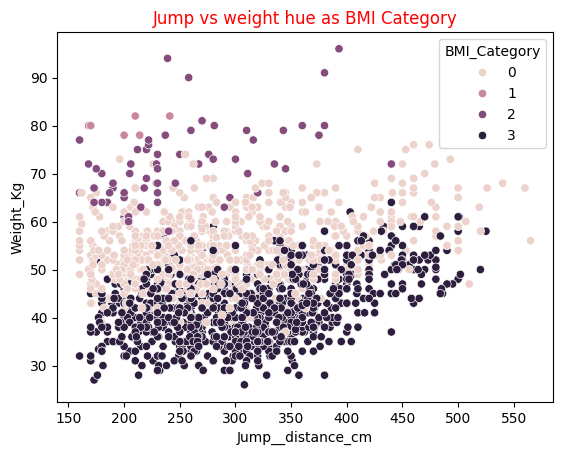

In [48]:
sns.scatterplot(x='Jump__distance_cm',y='Weight_Kg',data=df,hue='BMI_Category')
plt.title("Jump vs weight hue as BMI Category",color="red")

Text(0.5, 1.0, 'Jump vs weight hue as Gender 0-male,1- female')

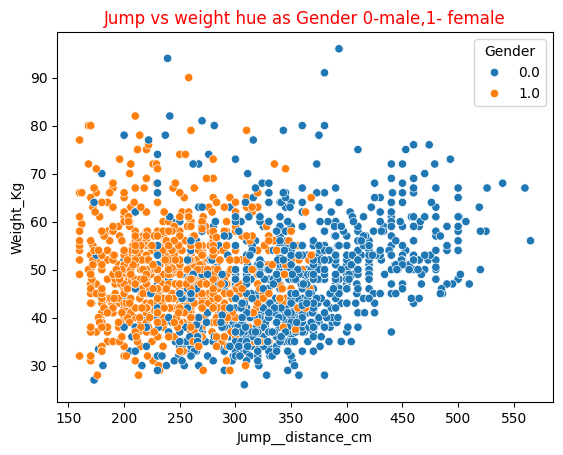

In [49]:
sns.scatterplot(x='Jump__distance_cm',y='Weight_Kg',data=df,hue='Gender')
plt.title("Jump vs weight hue as Gender 0-male,1- female",color="red")

Text(0.5, 1.0, '3=under,0=normal,2-over,1=obese')

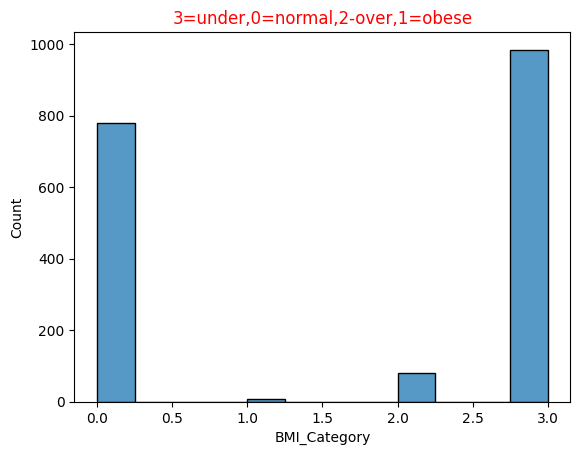

In [50]:
sns.histplot(df['BMI_Category'])
plt.title("3=under,0=normal,2-over,1=obese",color="red")

/tmp/ipython-input-51-3842030900.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Jump Distance by BMI Category')

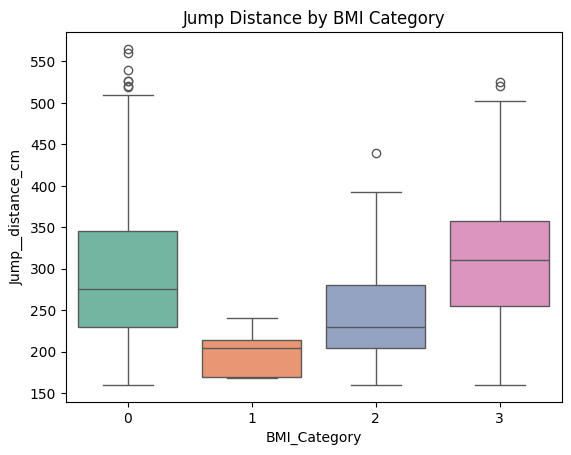

In [51]:
sns.boxplot(data=df, x='BMI_Category', y='Jump__distance_cm', palette='Set2')
plt.title("Jump Distance by BMI Category")


Text(0.5, 1.0, 'Speed Distribution')

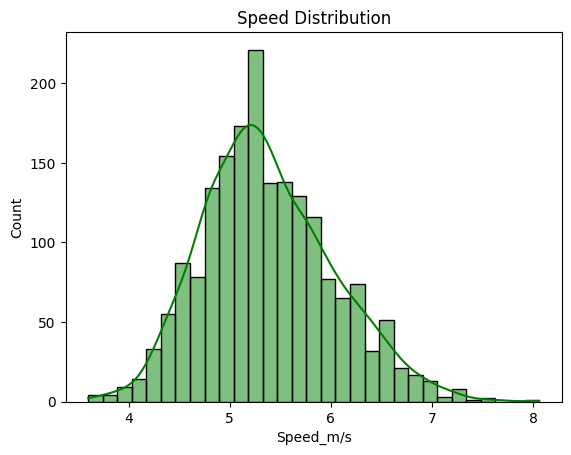

In [52]:
sns.histplot(df['Speed_m/s'], kde=True, color='green')
plt.title("Speed Distribution")


/tmp/ipython-input-53-1528895672.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Speed Distribution by Gender')

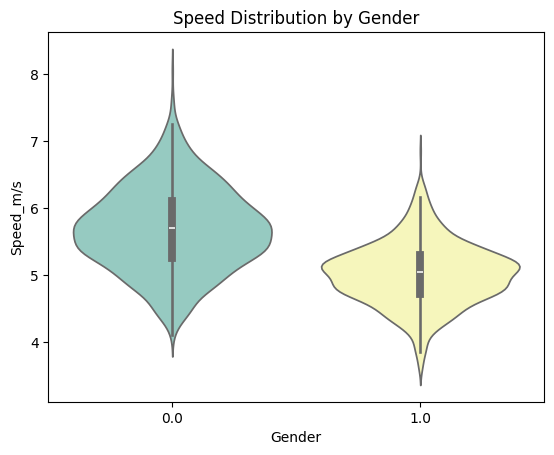

In [53]:
sns.violinplot(x='Gender', y='Speed_m/s', data=df, palette='Set3')
plt.title("Speed Distribution by Gender")


In [54]:
import plotly.express as px
fig = px.scatter_3d(df, x='Weight_Kg', y='Speed_m/s', z='Jump__distance_cm',
                    color='Gender', size='BMI', title='3D View of Jump Analysis')
fig.show()


/tmp/ipython-input-55-3087360756.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Jump Distance by Age')

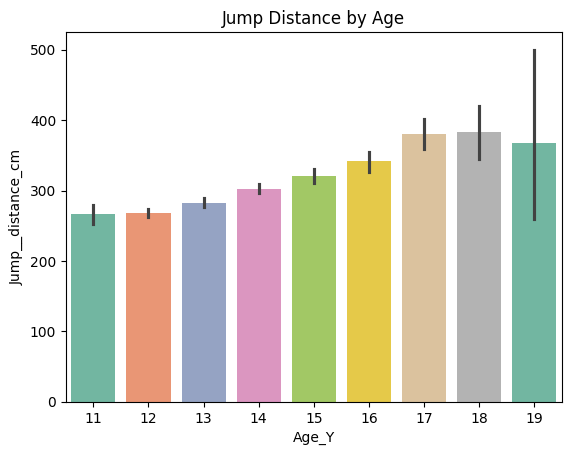

In [55]:
sns.barplot(data=df, x='Age_Y', y='Jump__distance_cm', palette='Set2')
plt.title("Jump Distance by Age")

In [56]:
df_clean = df.drop(columns=[
    'Power_to_Weight_Ratio',
    'Explosive_Power',
    'Relative_Jump_Distance',
    'Jump__Power_Watts',
    'ID'
])

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
df_clean

,Age_Y,Gender,Weight_Kg,Height_cm,BMI,Speed_m/s,Jump__distance_cm,BMI_Category,Speed_to_Height_Ratio
0,13,1.0,43.0,160,17,4.90,189,3,0.030625
1,13,1.0,47.0,158,19,5.15,267,0,0.032595
2,12,0.0,41.0,151,18,5.95,316,3,0.039404
3,12,0.0,44.0,145,21,4.72,203,0,0.032552
4,12,0.0,36.0,146,17,5.32,308,3,0.036438
...,...,...,...,...,...,...,...,...,...
1846,14,0.0,49.0,160,19,5.60,370,0,0.035000
1847,13,1.0,47.0,157,19,5.10,287,0,0.032484
1848,13,0.0,54.0,173,18,5.30,344,3,0.030636
1849,14,0.0,37.0,155,15,5.80,333,3,0.037419


In [59]:
x=df[[ 'Age_Y', 'Gender', 'Weight_Kg', 'Height_cm', 'BMI', 'Speed_m/s']]
y=df['Jump__distance_cm']


In [60]:

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=79)

In [61]:
xtr.shape

(1480, 6)

In [62]:
yte.shape

(371,)

In [63]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=60,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=79)
model3 = xgb.fit(xtr, ytr)

In [64]:
pred3=model3.predict(xte)
accuracy3=r2_score(yte,pred3)
print(accuracy3)

0.6858580112457275


In [68]:
x_n=np.array([13,1,47,158,19,5.15])
pred4=model3.predict(x_n.reshape(1,-1))
print(pred4)

[246.1411]


In [66]:
import joblib

# example: model is your trained ML model
joblib.dump(model3, 'model.pkl')


['model.pkl']